In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

data=pd.read_excel('CW_Data.xlsx',sheet_name='Sheet2')
data

Gender  Programme  Grade  Total  MCQ  Q1  Q2  Q3    Q4  Q5
0         1          3      3   45.0   21   8   4   2  10.0   0
1         2          3      3   43.0   21   4   2   8   8.0   0
2         1          4      2   26.0   24   0   0   2   0.0   0
3         2          1      3   30.0   24   4   0   0   0.0   2
4         1          2      3   27.0   21   0   2   4   0.0   0
..      ...        ...    ...    ...  ...  ..  ..  ..   ...  ..
614       2          1      2   55.0   33   6   4   4   8.0   0
615       2          4      2   41.0   27   6   4   4   0.0   0
616       2          1      2   73.0   36   8   8  11  10.0   0
617       2          1      2   77.0   42   8   8   6  10.0   3
618       2          1      2   22.0   12   4   0   4   2.0   0

[619 rows x 10 columns]

# Task 1

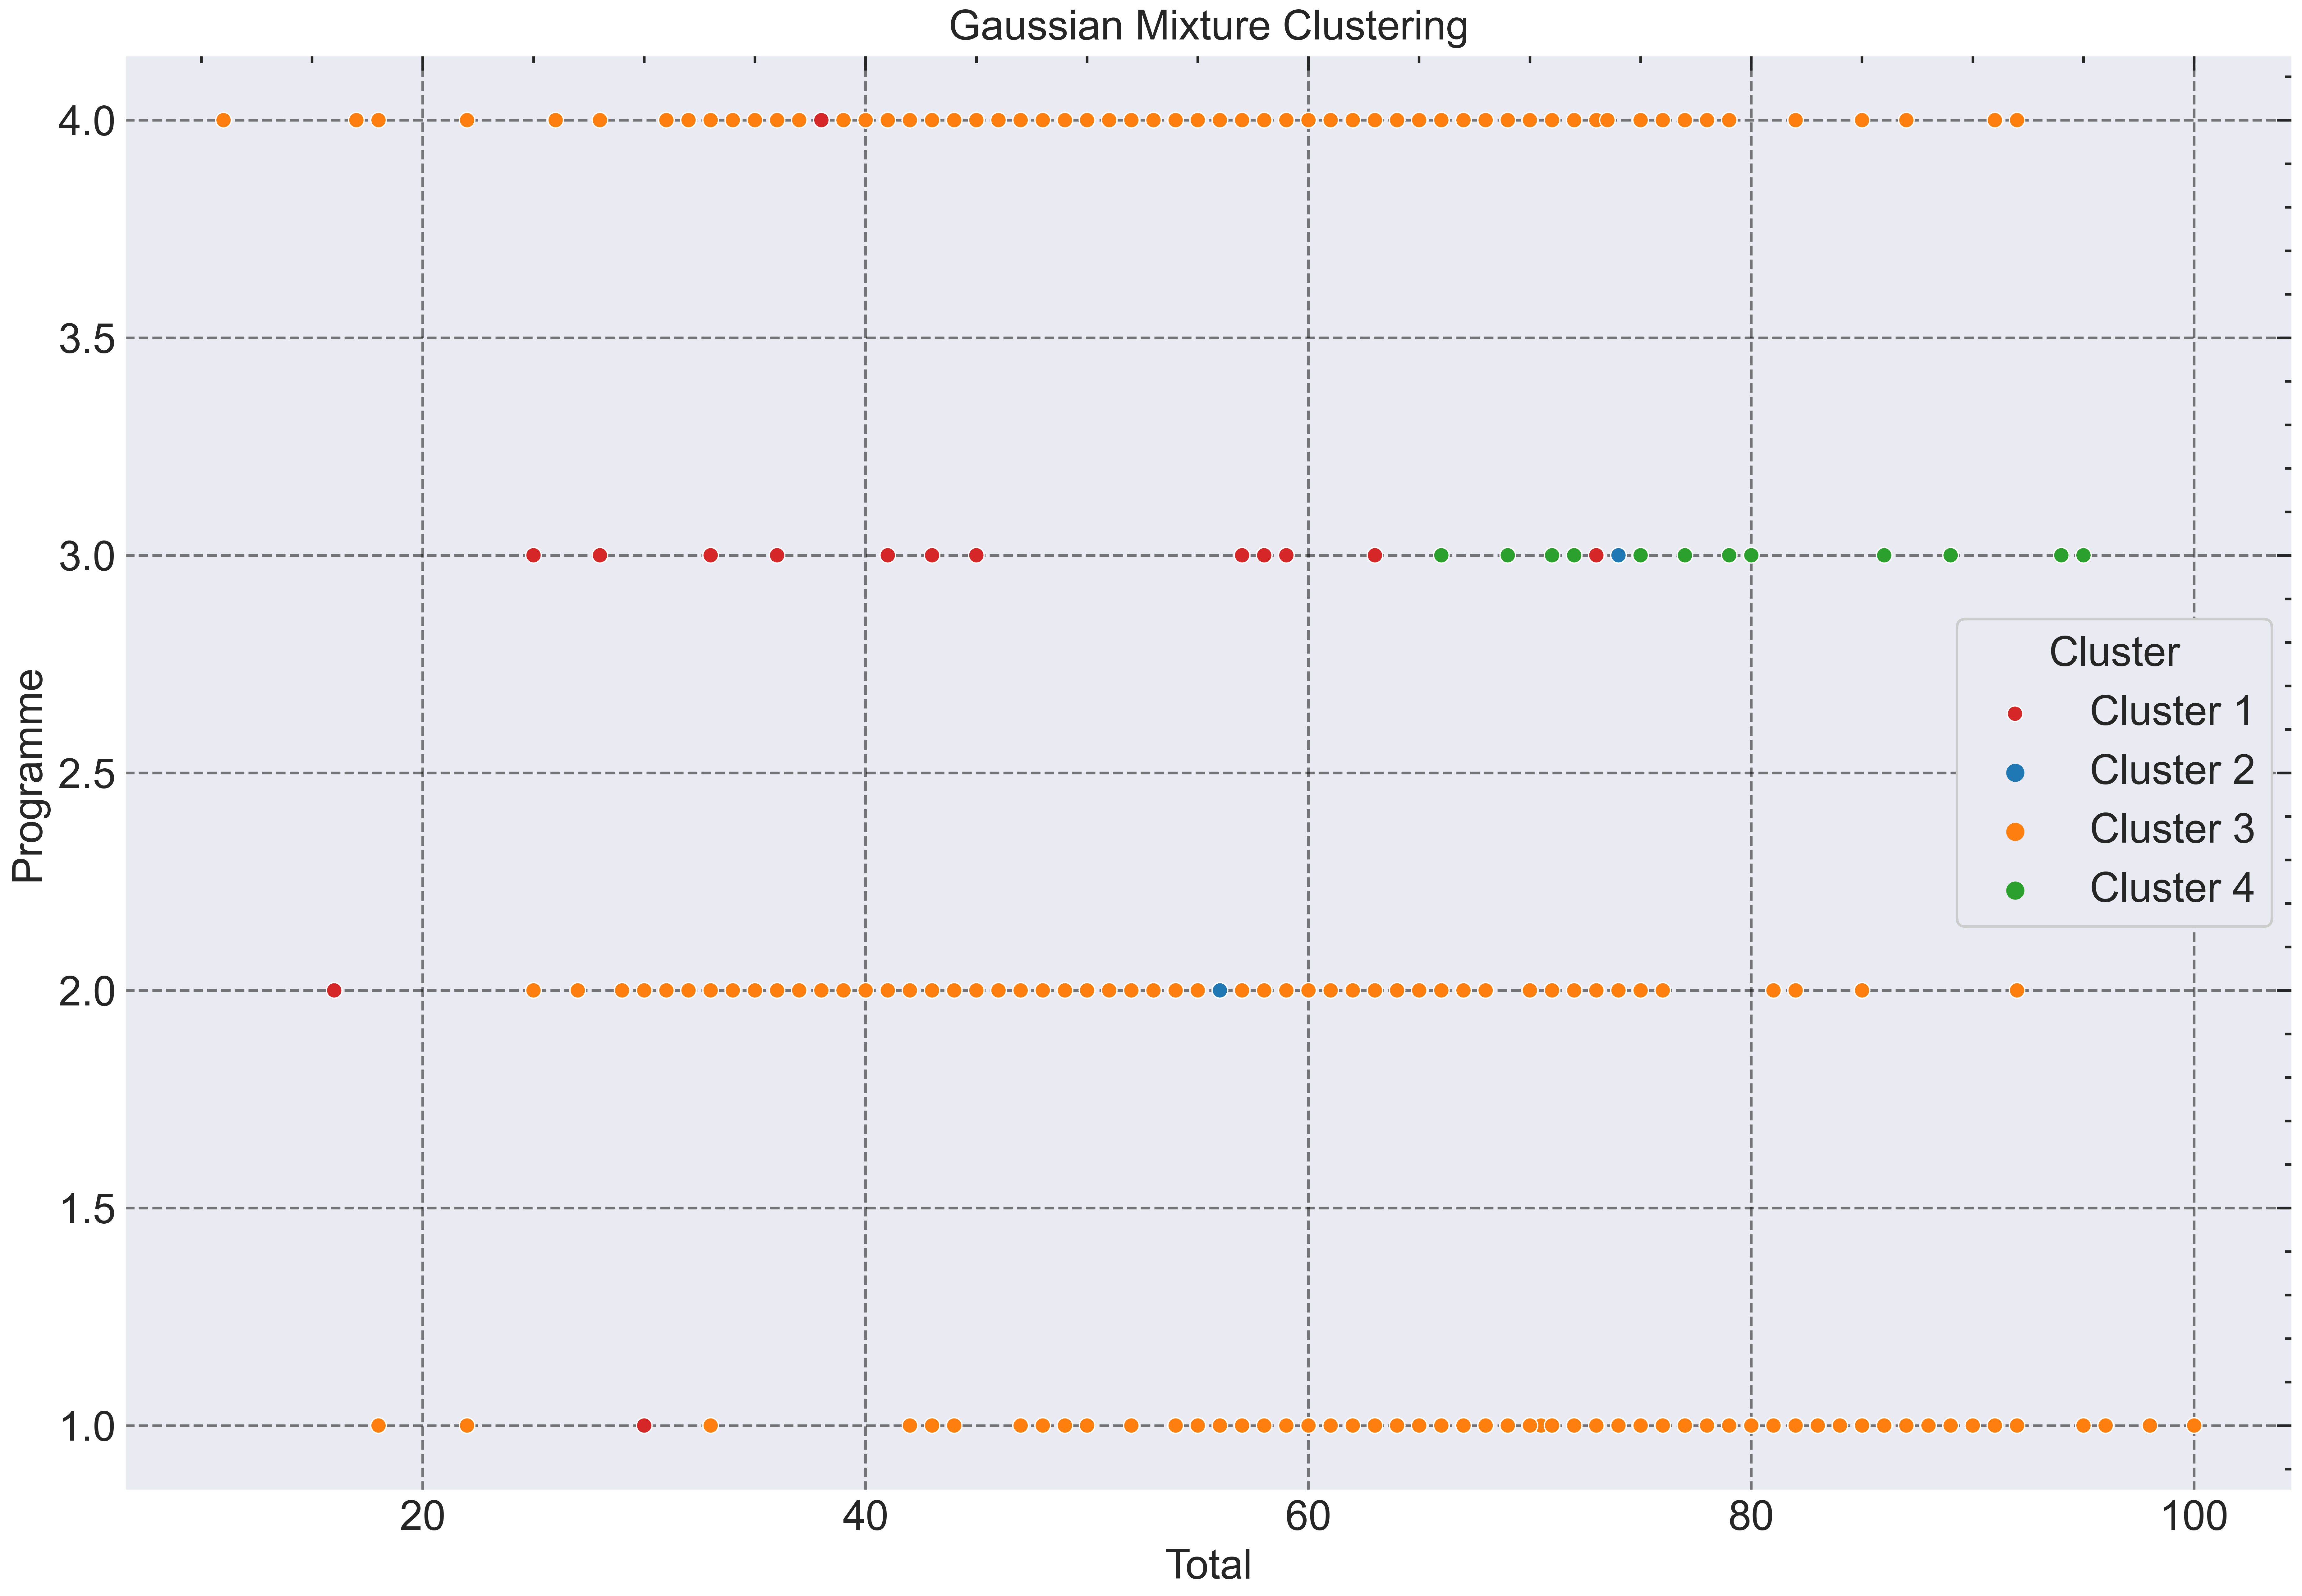

0.2197092084006462


In [29]:
#高斯混合聚类
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
#对Programme进行聚类，其他列是自变量
#predictors = ['Gender','Grade','Total','MCQ','Q1','Q2','Q3','Q4','Q5']
X = data[['Gender','Grade','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]
#聚类数目
n_clusters = 4
#高斯混合聚类
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(X)
#聚类结果
data['Cluster'] = gmm.predict(X)
#聚类结果可视化，聚类标签分类是1，2，3，4
with plt.style.context(['science','ieee','grid','notebook']):
    #增大图像
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data, x='Total', y='Programme', hue='Cluster', palette='tab10')
    plt.legend(title='Cluster', labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    plt.title('Gaussian Mixture Clustering')
    plt.xlabel('Total')
    plt.ylabel('Programme')
    plt.savefig('Gaussian Mixture Clustering.png', dpi=300, bbox_inches='tight')
    plt.show()
    
count=0
for i in range(619):
    if data['Programme'][i]==data['Cluster'][i]+1:
        count+=1

print(count/619)
    


# Task 2

D:\APP\Miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


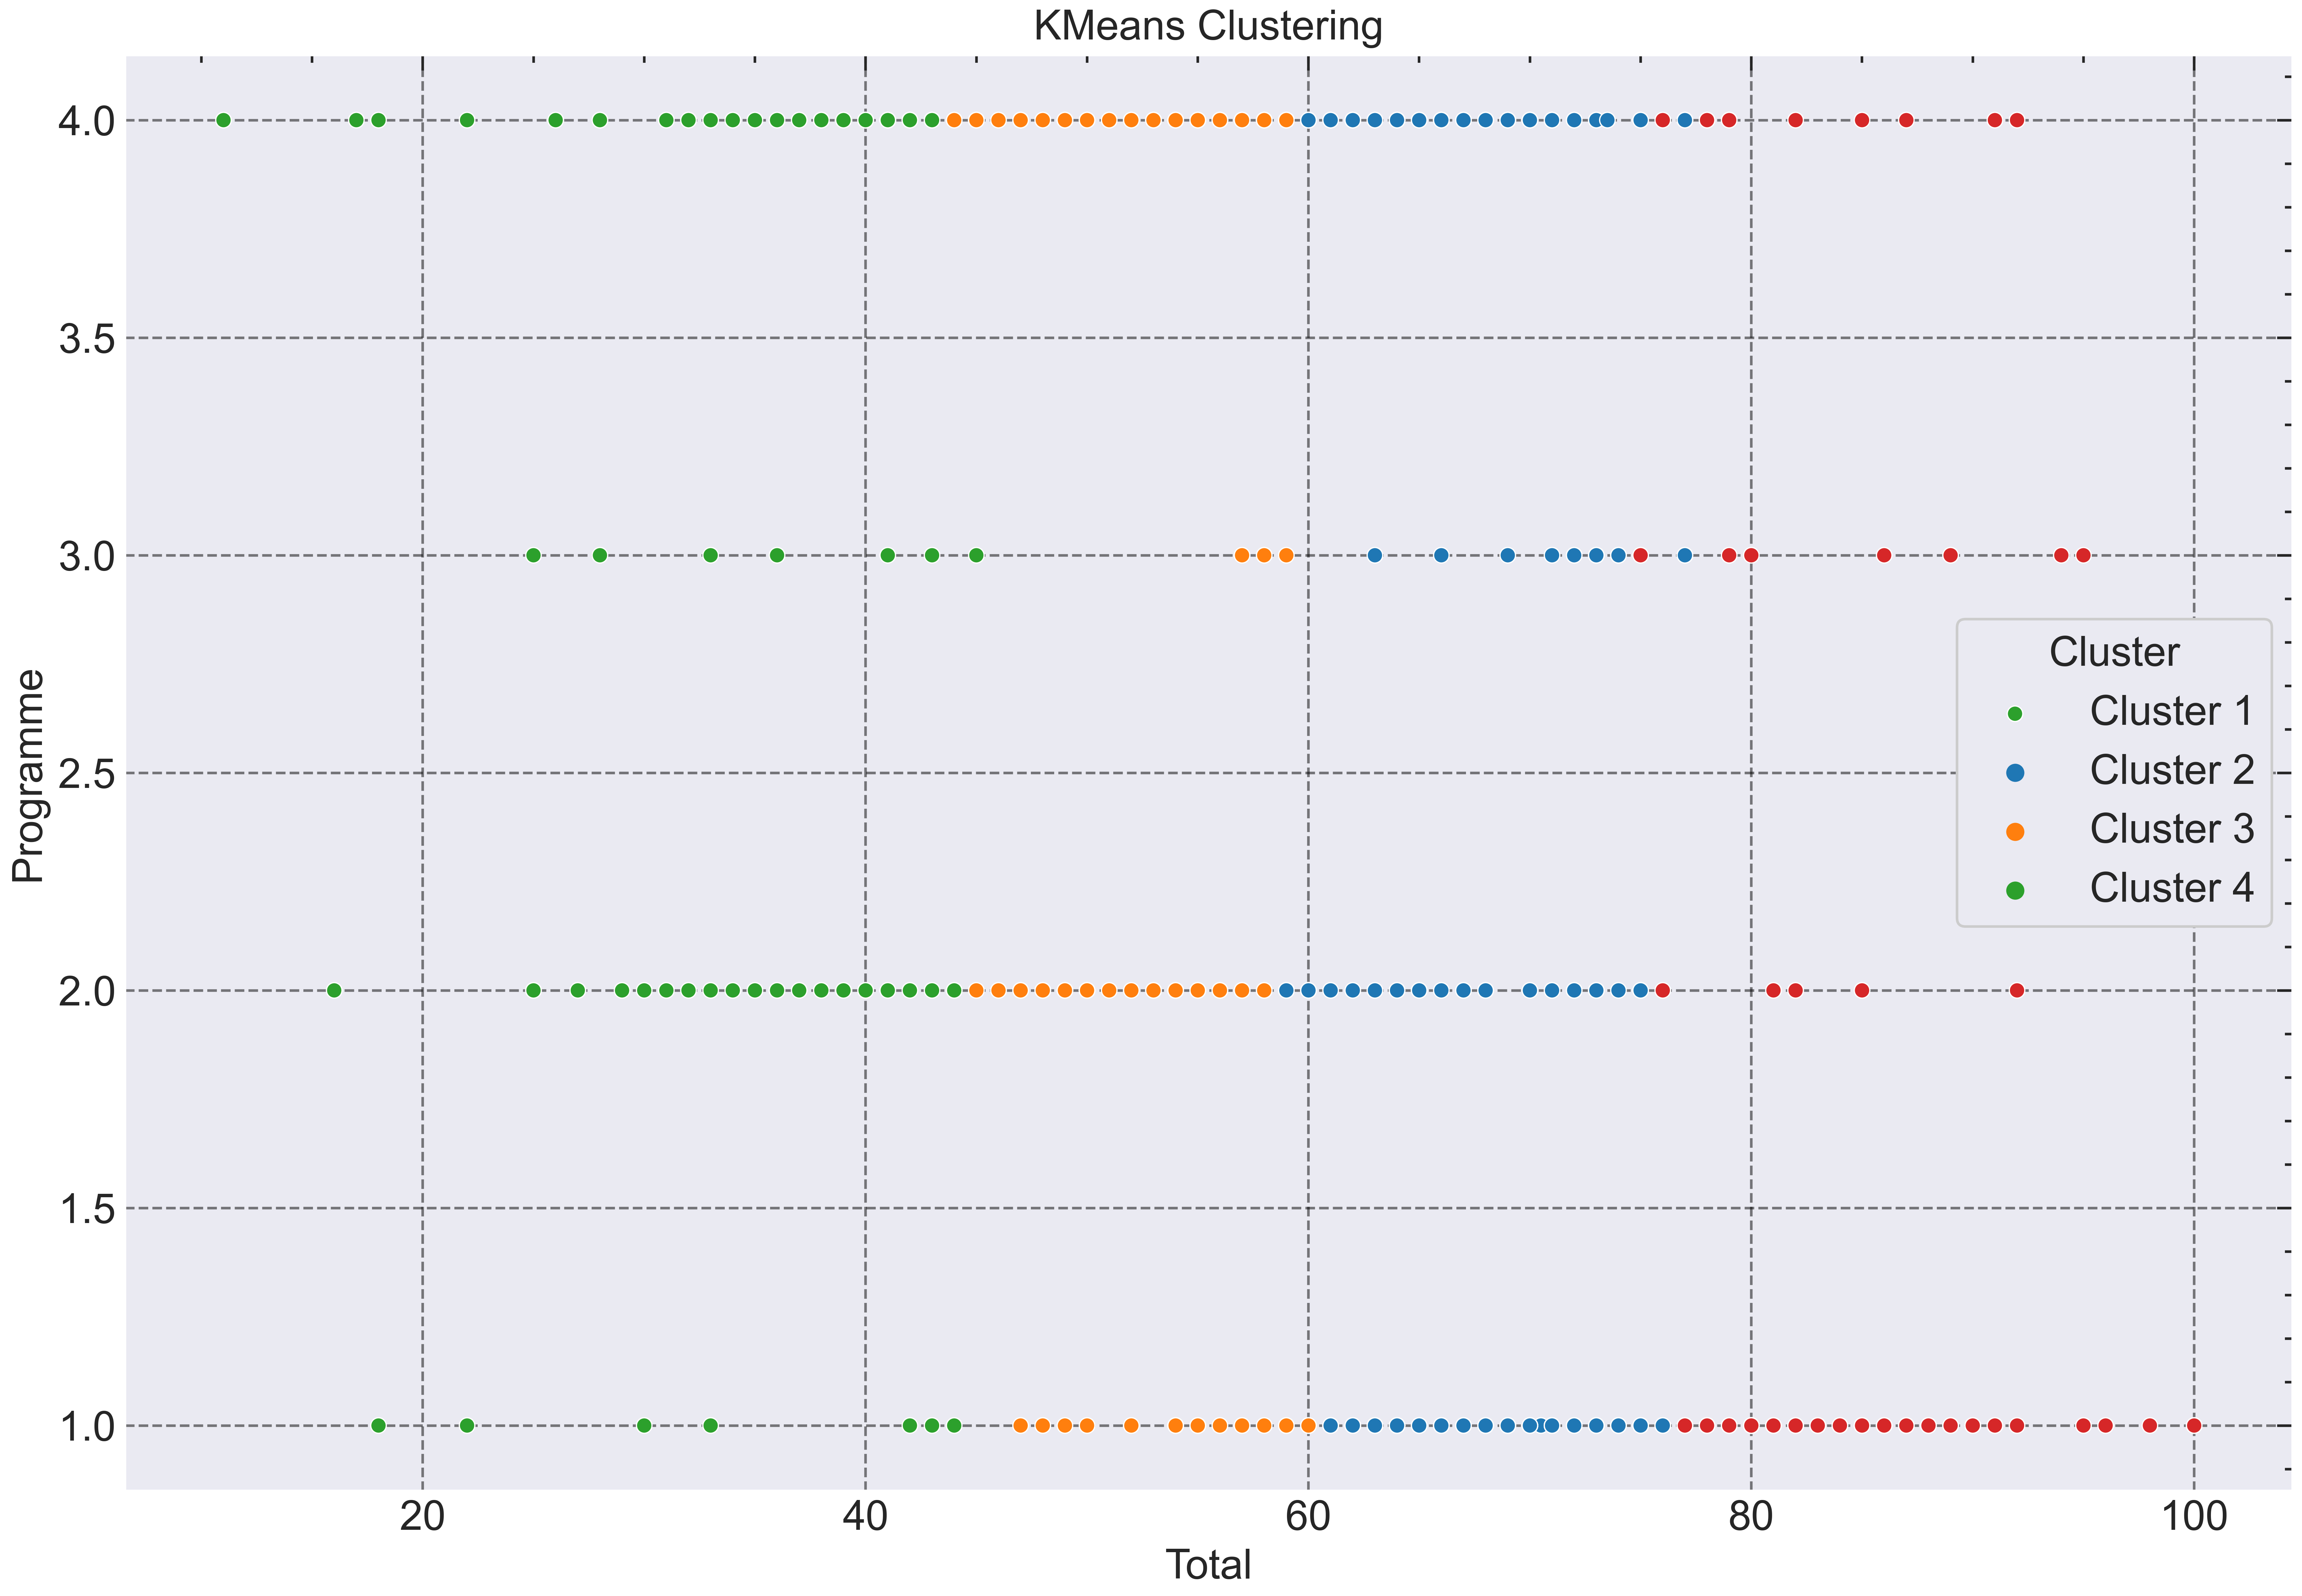

0.29079159935379645


In [26]:
#kmeans聚类
from sklearn.cluster import KMeans
X = data[['Gender','Grade','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
data['Cluster'] = kmeans.predict(X)
with plt.style.context(['science','ieee','grid','notebook']):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data, x='Total', y='Programme', hue='Cluster', palette='tab10')
    plt.legend(title='Cluster', labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    plt.title('KMeans Clustering')
    plt.xlabel('Total')
    plt.ylabel('Programme')
    plt.savefig('KMeans Clustering.png', dpi=300, bbox_inches='tight')
    plt.show()

count=0
for i in range(619):
    if data['Programme'][i]==data['Cluster'][i]+1:
        count+=1

print(count/619)
    

# Task 3

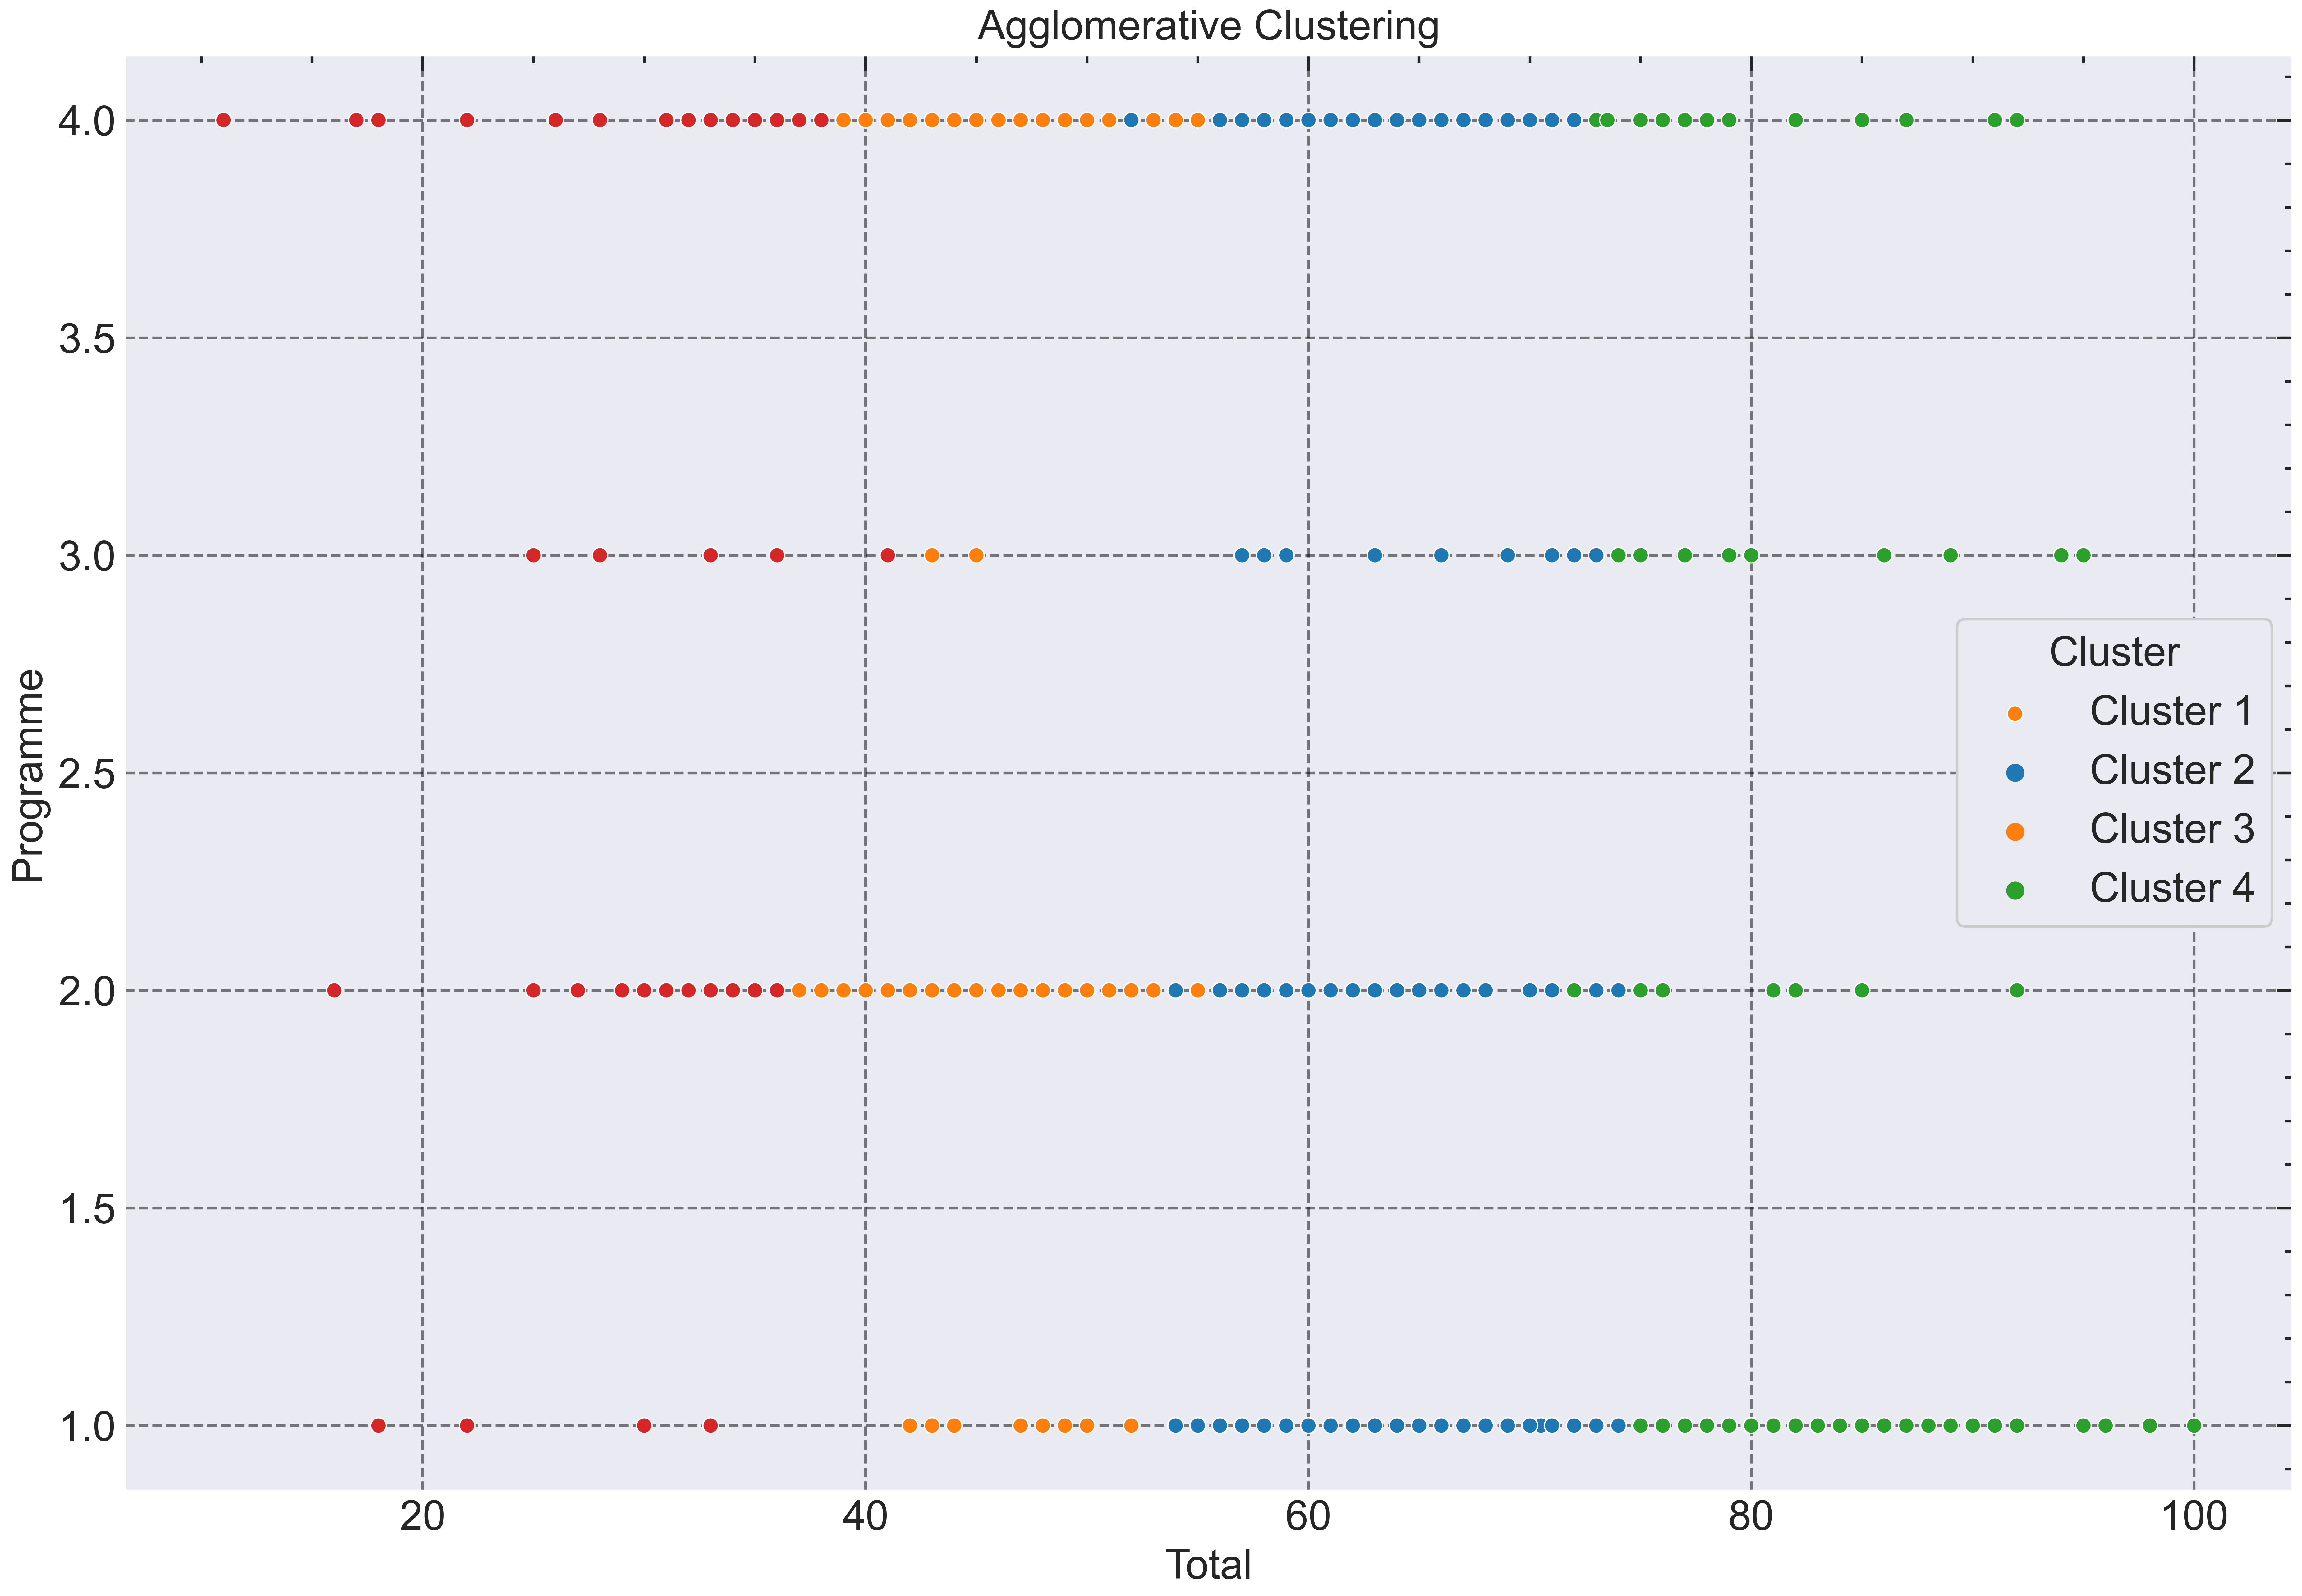

0.2940226171243942


In [27]:
#分层聚类
from sklearn.cluster import AgglomerativeClustering
X = data[['Gender','Grade','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]
n_clusters = 4
agg = AgglomerativeClustering(n_clusters=n_clusters)
data['Cluster'] = agg.fit_predict(X)
with plt.style.context(['science','ieee','grid','notebook']):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data, x='Total', y='Programme', hue='Cluster', palette='tab10')
    plt.legend(title='Cluster', labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
    plt.title('Agglomerative Clustering')
    plt.xlabel('Total')
    plt.ylabel('Programme')
    plt.savefig('Agglomerative Clustering.png', dpi=300, bbox_inches='tight')
    plt.show()
    
count=0
for i in range(619):
    if data['Programme'][i]==data['Cluster'][i]+1:
        count+=1

print(count/619)
    